In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100) # set to larger value to see all the columns of pd.DF


This is programming assignment for week 3. In this assignment you will be practicing with feature selection and hyperparameters tuning. 

Please, read all the notebook carefully and make sure that you understand not only the task, but the whole pipeline.

### Grading
The assignemnt is automatically graded. 

**Automatic grading**
After you finish solving all the tasks restart the kernel (`kernel -> restart`) and click the button `Validate` to check that everything works as expected. Afterwards, you can submit your work.


# Table of Contents:
* [Problem 1.](#part1)  Feature selection
     - [Task 1](#task1) [1 pt]
     - [Task 2](#task2) [1 pts]
     - [Task 3](#task3) [2 pts]
     - [Task 4](#task4) [1 pt]
     - [Task 5](#task5) [1 pts]
     - [Task 6](#task6) [2 pts]
     - [Task 7](#task7) [1 pts]
   
* [Problem 2](#part2). Hyperparameters Tuning
    - [Task 1](#task2_1) [1 pts]
    - [Task 2](#task2_2) [1 pts]



## Problem 1. Feature selection  <a class="anchor" id="part1"></a>
---

We will work with a Mercedes-Benz Greener Manufacturing dataset and try different feature engineering, feature selection and dimensionality reduction techniques to predict the time Mercedes-Benz cars spend on the test bench.

First, let's load the data and take a look at the dataset. Target variable to predict is y, the time for testing the car in seconds. We will exclude it from the feature set, as well as a column with unique car id, and split the dataset into training and validation samples.

In [8]:
file_path = "train_mercedes.csv"
df = pd.read_csv(file_path)
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.model_selection import train_test_split

y = df["y"]
X = df.drop(["ID", "y"], axis=1)

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=1)

---

### Baseline model

As we can see from a simple exploratory analysis, this dataset contains only categorical and ordinal features. Also, there are no missing values in any features. 

Thus, as a very first baseline model, we can just one-hot encode categorical variables and apply linear regression with $l_2$-regularization to predict target variable. 

In [10]:
bin_cols = X_tr.columns[X_tr.dtypes == "int64"].tolist() 
print("Number of binary features =", len(bin_cols))
cat_cols = X_tr.columns[X_tr.dtypes == "object"].tolist()
print("Number of categorical features =", len(cat_cols))

Number of binary features = 368
Number of categorical features = 8


In [11]:
print("Number of columns with any missing values:")
print(X_tr.isnull().any(axis=0).sum())

Number of columns with any missing values:
0



---
**Task 1.1** [1 pt] <a class="anchor" id="task1"></a>

We will evaluate model prediciton quality with $R^2$-score metric. Implement a function to evaluate performance of a given model both on the train and test sets. The function should
- take as input a model (possibly a pipeline), as well as feature matrix and target variable for both train and test sets,
- fit the model on the train set,
- compute model predictions for train and test sets,
- assess the quality of both predictions with $R^2$ score,
- return train and test $R^2$ scores.

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

def evaluate_model(model, X_tr, y_tr, X_te, y_te):
    # set a fixed random seed for model weights initialization 
    # to obtain reproducible results.
    # Do not change the value.
    if isinstance(model, Pipeline):
        model.set_params(estimator__random_state=0);    
    else:
        model.set_params(random_state=0);    

    # your code here
    model.fit(X_tr, y_tr)
    y_pred_tr=model.predict(X_tr)
    y_pred_te=model.predict(X_te)
    R2_tr = r2_score(y_tr, y_pred_tr, multioutput='variance_weighted')
    R2_te = r2_score(y_te, y_pred_te, multioutput='variance_weighted')
    
    return R2_tr, R2_te

In [13]:
from sklearn.linear_model import Ridge
# TEST evaluate_model 
res = evaluate_model(Ridge(), X_tr.iloc[:100, 10:11], y_tr[:100], X_tr.iloc[100:150, 10:11], y_tr[100:150])
print('R2 on train:', res[0])
print('R2 on test:', res[1])

assert np.allclose(
    np.round(evaluate_model(Ridge(), 
                            X_tr.values[:100, 8:16], y_tr.values[:100],
                            X_tr.values[100:150, 8:16], y_tr.values[100:150]), 3), 
    [0.136, 0.094]
)

R2 on train: 0.03454859974270774
R2 on test: -0.02162045646924393



---
**Task 1.2** [1 pt] <a class="anchor" id="task2"></a>

Initialize the baseline model. It should represent a pipeline including ohe-hot encoding of categorical variables and a `Ridge` regression (`sklearn` imlementation of linear regression with $l_2$ regularization) model with default parameters. 

- create `col_transformer` - ColumnTransformer pipeline with a single transformer - `OneHotEncoder` applied to categorical columns (**cat_cols**) only. To keep other (binary) features, use `remainder=passthrough` argument of `ColumnTransformer`.
- create `model` - Pipeline with two steps:
    - **col_transformer** you created before (used to encode categorical features)
    - **estimator** should be a `Ridge` regression with default parameters. *Please, make sure that this step is named exactly **estimator**. It will be used in the latter tasks.* 

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# your code here
col_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'),cat_cols),
], remainder = 'passthrough'
)

model =Pipeline([
    ('col_transformer', col_transformer),
    ('estimator', Ridge())
    
])

In [62]:
# TEST baseline model
print('Column transformers:')
print(col_transformer.transformers)

print('Pipeline:')
print(model.steps[0])
print(model.steps[1])

# test transformers 
assert len(col_transformer.transformers) == 1, 'col_transformer should exactly 1 transformation'
assert isinstance(col_transformer.transformers[0][1], OneHotEncoder), 'col_transformer should use OneHotEncoder'
assert set(col_transformer.transformers[0][2]) == set(cat_cols), 'col_transformer should be applied to all cat_cols'

# test model pipeline
assert isinstance(model.steps[0][1], ColumnTransformer), 'First step of the pipeline should be columns transformer'
assert model.steps[1][0]=='estimator', 'Second step of the pipeline should be named "estimator"'
assert isinstance(model.steps[1][1], Ridge), 'Second step of the pipeline should be Ridge regression'

Column transformers:
[('ohe', OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True), ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'])]
Pipeline:
('col_transformer', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('ohe',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6',
                                  'X8'])],
                  verbose=False))
('estimator', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001))


Now we can evaluate the baseline model performance:

In [63]:
R2_tr, R2_te = evaluate_model(model, X_tr, y_tr, X_te, y_te)
print("Train R2 = %.2f" % R2_tr)
print("Test R2 = %.2f" % R2_te)

Train R2 = 0.62
Test R2 = 0.57


As we can see, model performance on the training set is slightly higher than on the test data. This can mean that there is overfitting, which is especially likely when number of features is large.

In [64]:
print("Number of features before one-hot-encoding: ")
print(X_tr.shape[1])
print()
print("Number of features after one-hot-encoding: ")
print(col_transformer.fit_transform(X_tr).shape[1])

Number of features before one-hot-encoding: 
376

Number of features after one-hot-encoding: 
560



As we can see, there were quite a lot of features in the original sample, and after the one-hot encoding of categorical variables, their number increased by almost one and a half times.


To avoid overfitting, it can be helpful to reduce the number of variables by selecting the most important ones. In our sample, all the variables are anonymized. However we can still select the most relevant based not on their physical meaning, but on their observed predictive power and informativeness for the model.

### Filter-based methods
<!-- ### Univariate feature selection (filter-based methods) -->

The most simple group of feature selection approaches are filter-based methods or univariate feature selection. These methods are based on analysis of individual predictive power of each variable. In our case, since we have a regression problem, we can simply check the correlation of each feature with the target variable. 

In `sklearn`, you can find a ready-to-use implementation of univariate feature selection algorithm - `SelectKBest` transformer, which filters out a set of **k** features basen on the values of **scoring function**. 


---
**Task 1.3** [2 pts] <a class="anchor" id="task3"></a>

Implement a function to compute absolute value of correlation of each feature variable with the target variable.
 The function should:
- take as input the feature matrix and the target variable,
- compute correlation coefficient of each feature in the feature matrix and the target variable,
- return a vector of correlation coefficient for all features in the dataset.

In [89]:
def get_abs_corr_coef(X, y):
    """
    Compute

    Parameters
    ----------
    X : numpy.ndarray of shape (n_samples, n_features)
        Feature matrix.
    y : numpy.ndarray of shape (n_samples,)
        Target variable
    
    Returns
    -------
    corr_coefs : numpy.ndarray of shape (n_features,)
        Vector of absolute values of correlation coefficients 
        for all features
    """
    # your code here
    X_df = pd.DataFrame(X)
    #print(X_df)
    X_df['target'] = y
#     corr_coefs = abs(X_df.corr()['target'][0:3])
    corr_coefs = abs(X_df.corr()['target'])[0:-1]
    #corr_coefs = abs(corr_coef_all)
    #print(corr_coefs)
    #df[df.columns[1:]].corr()['LoanAmount'][:]
#     corr_coefs = list(corr_coefs)
#     print(corr_coefs.shape)
#     print(type(corr_coefs))
    return corr_coefs

In [90]:
# TEST get_abs_corr_coef
A = np.array(
    [[1, 0, 0],
     [0, 0.5, -0.5],
     [0, 1, -1]]
)
b = [0, 1, 1]
print(get_abs_corr_coef(A, b))

A = np.array(
    [[1, 0, 0],
     [0, 0.5, -0.5],
     [0, 1, -1]]
)
b = [0, 1, 1]
corr = get_abs_corr_coef(A, b)
assert len(corr) == 3, 'Length of the outut vector should be equal to the number of features'
assert np.all(corr >= 0), 'Function should return absolute values'
assert np.allclose(corr, [1.       ,  0.86603, 0.86603]), 'Correlations are not computed correctly'

0    1.000000
1    0.866025
2    0.866025
Name: target, dtype: float64


Now we can check how model performance changes if we use only `k=60` variables with strongest correlation (both positive and negative) with the target variable.


---
**Task 1.4** [1 pt] <a class="anchor" id="task4"></a>

Initialize the model with filter-based feature selection. 


Create `model_k_best` - Pipeline with three steps:
- **col_transformer** that you've created in task 1.2
- **feat_selector**  - `SelectKBest` transformer. It should use `get_abs_corr_coef` scoring function to select `30` features. 
- **estimator** - `Ridge` regression with default parameters. *Please, make sure that this step is named exactly **estimator**. It will be used in the latter tasks.*

In [91]:
from sklearn.feature_selection import SelectKBest

feat_selector = SelectKBest(get_abs_corr_coef, k=30)
# your code here
#model_k_best =Pipeline([
#    ('col_transformer', col_transformer),
 #   ('feat_selector', feat_selector)
  #  ('estimator', Ridge()),
   # ])

model_k_best =Pipeline([
    ('col_transformer', col_transformer),
    ('feat_selector', feat_selector),
    ('estimator', Ridge())
    
])




In [92]:
# TEST model with filter-based feature selection


print('Pipeline:')
print(model_k_best.steps[0])
print(model_k_best.steps[1])
print(model_k_best.steps[2])

# test model pipeline
assert isinstance(model_k_best.steps[0][1], ColumnTransformer), 'First step of the pipeline should be columns transformer'
assert isinstance(model_k_best.steps[1][1], SelectKBest), 'Second step of the pipeline should be SelectKBest'
assert model_k_best.steps[2][0]=='estimator', 'Third step of the pipeline should be named "estimator"'
assert isinstance(model_k_best.steps[2][1], Ridge), 'Third step of the pipeline should be Ridge regression'

Pipeline:
('col_transformer', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('ohe',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6',
                                  'X8'])],
                  verbose=False))
('feat_selector', SelectKBest(k=30, score_func=<function get_abs_corr_coef at 0x7fa3a19583b0>))
('estimator', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001))


In [93]:
R2_tr_kbest, R2_te_kbest = evaluate_model(model_k_best, X_tr, y_tr, X_te, y_te)
print("Train R2 = %.2f" % R2_tr_kbest)
print("Test R2 = %.2f" % R2_te_kbest)

Train R2 = 0.54
Test R2 = 0.59


### Wrapper methods 

In wrapper methods, feature selection process is based on the greedy search.  Different combinations of features are evaluated and compared using the evaluation criterion, which is simply the performance of the trained model, measured with any appropriated score.


Sklearn has a ready-to-use implementation of a wrapper feature selection algorithm called **Recursive Feature Elimination** (RFE). 

The algorithm works by iteratively eliminating features which turned out to be least important based on their weights (or other importance scores) in the trained model. For instance, if the linear regression is used as a base algorithm in selection process, the model is first trained on the whole feature set. Then, the features with smallest weights (coefficients) are excluded, and the model is re-trained on the remaining feature set. The process is repeated until the desired number of features is reached.


---
**Task 1.5** [1 pt] <a class="anchor" id="task5"></a>

Initialize the model with Recursive Feature Elimination method for feature selection.



Create `model_rfe` - Pipeline with three steps:
- **col_transformer** that you've created in task 1.2
- **feat_selector**  - `RFE` transformer. It should use `Ridge` regression with default parameters as an internal estimator to select `20` features. 
- **estimator** - `Ridge` regression with default parameters. 


*Note, that instance of Ridge regression used in `RFE` transformer should not be the same used as estimator. You need 2 independent instances of th esame model.*

In [94]:
from sklearn.feature_selection import RFE

estimator = Ridge()
feat_selector_rfe = RFE(estimator, n_features_to_select=20)
# your code here
model_rfe =Pipeline([
    ('col_transformer', col_transformer),
    ('feat_selector_rfe', feat_selector_rfe),
    ('estimator', Ridge())
    
])

In [95]:
# TEST model with wrapper feature selection


print('Pipeline:')
print(model_rfe.steps[0])
print(model_rfe.steps[1])
print(model_rfe.steps[2])

# test model pipeline
assert isinstance(model_rfe.steps[0][1], ColumnTransformer), 'First step of the pipeline should be columns transformer'
assert isinstance(model_rfe.steps[1][1], RFE), 'Second step of the pipeline should be RFE'
assert isinstance(model_rfe.steps[1][1].estimator, Ridge), 'RFE should use Ridge as an estimator'
assert model_rfe.steps[1][1].n_features_to_select == 20, 'RFE should select 30 features'
assert isinstance(model_rfe.steps[2][1], Ridge), 'Third step of the pipeline should be Ridge regression'

Pipeline:
('col_transformer', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('ohe',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6',
                                  'X8'])],
                  verbose=False))
('feat_selector_rfe', RFE(estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
                    normalize=False, random_state=None, solver='auto',
                    tol=0.001),
    n_features_to_select=20, step=1, verbose=0))
('estimator', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state

Evaluate the model (it may take some time). 

In [96]:
R2_tr_rfe, R2_te_rfe = evaluate_model(model_rfe, X_tr, y_tr, X_te, y_te)
print("Train R2 = %.2f" % R2_tr_rfe)
print("Test R2 = %.2f" % R2_te_rfe)

Train R2 = 0.54
Test R2 = 0.57


Two widely used wrapper feature selection approaches a **Forward** and **Backward** sequential feature selection. 

In **Forward feature selection** method, one starts from an empty set of selected features. Then, in each iteration, the feature that improves the model performance most is added to the feature set. The process continues until desired number of features is achieved or an addition of a new feature does not improve the model performance.

In **Backward feature selection** method, one starts from the set of all features and iteratively removes the feature, the elimination of which improves the model performance most. Again, the process continues until desired number of features is achieved or an elimination of another feature does not improve the model performance.

In the cases when number of feature is very large, and number of informative ones is expected to be considerably smaller, backward feature selection algorithm can take very long time to converge, and forward feature selection is usually preferred.


---
**Task 1.6** [2 pts] <a class="anchor" id="task6"></a>

Implement a transformer class to perform forward feature selection of a predefined number of features. 
- Start from an **empty** set of **selected features**. 
- At each step, train the model on the current set of selected features and one of the yet not selected features - **candidate features**. Score model either on the training, or on validation set and collect model scores for all candidate features.
- Select from candidate features the feature, that improved model performance most, add it to the set of selected features and eliminate from candidate features.
- Repeat until the desired number of selected features is achieved.

In [97]:
from sklearn.base import TransformerMixin, BaseEstimator

class ForwardFeatureSelection(BaseEstimator, TransformerMixin):
    """
    Selects features by iteratively adding the features 
    which provides the highest model score.

    Parameters
    ----------
    estimator : object
        A supervised learning estimator with ``fit`` and ``score`` methods.
    n_features_to_select : int 
        The number of features to select.
    """

    def __init__(self, 
                 estimator,
                 n_features_to_select,
                ):
        
        self.estimator = estimator
        self.n_features_to_select = n_features_to_select
#         self.score_on_set = score_on_set
    
    def fit(self, X, y):
        """
        Perform forward feature selection and save selected feature subset.

        Parameters
        ----------
        X : pd.DataFrame or numpy.ndarray of shape (n_samples, n_features)
            Feature matrix.
        y : pd.Series or numpy.ndarray of shape (n_samples,) (default : None)
            Target values.

        Returns
        -------
        self : returns an instance of self.
        """
        if type(X) is not np.ndarray:
            X = X.values
        if type(y) is not np.ndarray:
            y = y.values

        feats_idx = list(range(X.shape[1])) # not yet selected features
        self.selected_feats_idx = [] # selected features
        self.selected_feats_scores = [] # scores of the selected features
        


        X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=1)

        for it in range(self.n_features_to_select):
            scores = []
            for i in feats_idx: 
                # use `self.estimator` to compute score after addition of the feature number `i`
                # your code here
                feature_idx_list = self.selected_feats_idx+[i]
                
                df_festures_tr=X_tr[:,feature_idx_list]
                df_festures_te=X_te[:,feature_idx_list]
                self.estimator.fit(df_festures_tr,y_tr)
                
                score = self.estimator.score(df_festures_te,y_te)
                scores.append(score)
                
                
            # select feature with thte best score
            best_score_idx = np.argmax(scores)
            self.selected_feats_scores.append(scores[best_score_idx])
            self.selected_feats_idx.append(feats_idx[best_score_idx])
            feats_idx.remove(feats_idx[best_score_idx])
       
        return self
    
    def transform(self, X):
        """
        Select features according to precomputed feature subset.

        Parameters
        ----------
        X : numpy.ndarray of shape (n_samples, n_features)
            Feature matrix.
        
        Returns
        -------
        X_transformed : array-like of shape (n_samples, n_features)
            Transformed feature matrix. 
        """
        if type(X) is not np.ndarray:
            X = X.values
        # use `self.selected_feats_idx` to select "the best" features
        # your code here
        best_feat = self.selected_feats_idx                                          
        X_transformed = X[:,best_feat]
        
        return X_transformed

In [98]:
# TEST ForwardFeatureSelection on toy example
test_data_X = X_tr.iloc[:100, 10:]
test_data_y = y_tr[:100]

selector = ForwardFeatureSelection(Ridge(), 2)

# fit
selector.fit(test_data_X, test_data_y)
print('Selected columns:')
print(test_data_X.columns[selector.selected_feats_idx])

# transform
X_transformed = selector.transform(test_data_X)
print(X_transformed[:5])

selector = ForwardFeatureSelection(Ridge(random_state=100), 4)

selector.fit(test_data_X, test_data_y)
selected_4 = selector.selected_feats_idx
assert len(selector.selected_feats_idx) == 4, 'Wong number of features selected'

selector = ForwardFeatureSelection(Ridge(random_state=100), 2)
selector.fit(test_data_X, test_data_y)
selected_2 = selector.selected_feats_idx
assert set(selected_2) == set(selected_4[:2]), 'Columns are not selected correctly'

Selected columns:
Index(['X314', 'X29'], dtype='object')
[[1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]]



---
**Task 1.7** [1 pt] <a class="anchor" id="task7"></a>

Initialize the model with Forward Feature Selection method. 




Create `model_forward` - Pipeline with three steps:
- **col_transformer** that you've created in task 1.2
- **feat_selector**  - `ForwardFeatureSelection` transformer implemented in the previous task. It should use `Ridge` regression with default parameters as an internal estimator to select `20` features. 
- **estimator** - `Ridge` regression with default parameters.


*Note, that instance of Ridge regression used in `ForwardFeatureSelection` transformer should not be the same used as estimator. You need 2 independent instances of th esame model.*

In [99]:
# your code here
feat_selector_forward = ForwardFeatureSelection(Ridge(random_state=100), 20)
model_forward =Pipeline([
    ('col_transformer', col_transformer),
    ('feat_selector_forward', feat_selector_forward),
    ('estimator', Ridge())
    
])

In [100]:
# TEST model with ForwardFeatureSelection


print('Pipeline:')
print(model_forward.steps[0])
print(model_forward.steps[1])
print(model_forward.steps[2])

# test model pipeline
assert isinstance(model_forward.steps[0][1], ColumnTransformer), 'First step of the pipeline should be columns transformer'
assert isinstance(model_forward.steps[1][1], ForwardFeatureSelection), 'Second step of the pipeline should be ForwardFeatureSelection'
assert isinstance(model_forward.steps[1][1].estimator, Ridge), 'RFE should use Ridge as an estimator'
assert model_forward.steps[1][1].n_features_to_select == 20, 'RFE should select 30 features'
assert isinstance(model_forward.steps[2][1], Ridge), 'Third step of the pipeline should be Ridge regression'

Pipeline:
('col_transformer', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('ohe',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6',
                                  'X8'])],
                  verbose=False))
('feat_selector_forward', ForwardFeatureSelection(estimator=Ridge(alpha=1.0, copy_X=True,
                                        fit_intercept=True, max_iter=None,
                                        normalize=False, random_state=100,
                                        solver='auto', tol=0.001),
                        n_features_to_select=20))
('estimato

Evaluate the model (it may take some time). 

In [101]:
R2_tr_forward, R2_te_forward = evaluate_model(model_forward, X_tr, y_tr, X_te, y_te)
print("Train R2 = %.2f" % R2_tr_forward)
print("Test R2 = %.2f" % R2_te_forward)

Train R2 = 0.55
Test R2 = 0.61


Let us see, how the performance of the model was changing.

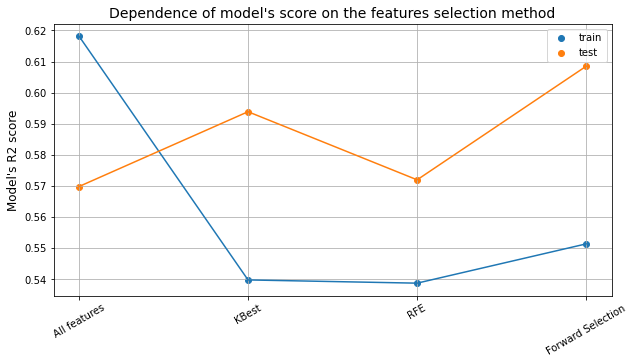

In [102]:
train_scores = [R2_tr, R2_tr_kbest, R2_tr_rfe, R2_tr_forward]
test_scores = [R2_te ,R2_te_kbest, R2_te_rfe, R2_te_forward]
models = ['All features', 'KBest', 'RFE', 'Forward Selection']
 
plt.figure(figsize=(10, 5))
plt.plot(train_scores)
plt.plot(test_scores)
plt.scatter(range(len(models)), train_scores, label="train")
plt.scatter(range(len(models)), test_scores, label="test")
plt.xticks(range(len(models)), models, rotation=30)
plt.ylabel("Model's R2 score", fontdict={"size" : 12})
plt.title("Dependence of model's score on the features selection method", fontdict={"size" : 14})
plt.legend()
plt.grid()
plt.show()

---
## Problem 2. Model hyperparameter tuning  <a class="anchor" id="part2"></a>
---

In the previous task, we used Ridge regression with $l_2$ regularization to predict the target variable. The model hyperparameter `alpha` determines the strength of the regularization, but so far we have used its default value ($alpha = 1$), which may be not optimal. 

In addition, different models may require different degrees of regularization, and it would be incorrect to compare their quality with one fixed value. Now we will optimize the degree of regularization of our regression model.

<!-- Among `sklearn.linear_models`, you can find implementation of the regression models with $l_1$ regularization (`Lasso`), $l_2$ regularization (`Ridge`), as well as their combination (`ElasticNet`). -->

**Grid search** is commonly used to find the optimal value of the regularization coefficient (and other model hyperparameters). For each combination of hyperparameters, a model is trained, and its performance is measured on a validation set or using cross-validation. The set of hyperparameters at which the model achieves the best validation performance is optimal.

Note that the test set on which the final model evaluation is performed should not be used as a validation set for hyperparameter tuning. Otherwise, overfitting occurs and the model quality measured on this test set no longer reflects its predictive ability for the new unseen data. 

`Sklearn` has ready-to-use implementation of grid search - `GridSearchCV` estimator.  It evaluates model performance on cross-validation for each hyperparameter set and selects the best model accordingly.

---
**Task 2.1** [1 pt] <a class="anchor" id="task2_1"></a>


Use `GridSearchCV` to find optimal $l_2$ regularization coefficient for two models: 
1. Baseline pipeline without feature selection (`model` from task 1.2)
2. Pipeline with univariate feature selection (`model_k_best` from task 1.4).

Then, compare which model is better with optimal hyperparameters.

- We will use `alphas` - list of regularization coefficient (`estimator__alpha`) to search through. 

- Create two `GridSearchCV` objects 
    - `grid_cv` for baseline model 
    - `grid_cv_k_best` for model with feature selection. 

- For each model, fit `GridSearchCV` on the whole training set `X_tr`. Optimize $R^2$-score on 3-fold cross-validation. 

In [103]:
from sklearn.model_selection import GridSearchCV
alphas = np.logspace(-4, 4, 9)
param_grid = {
    "estimator__alpha" : alphas,
}
# your code here
grid_cv = GridSearchCV(model, param_grid=param_grid, cv=3, scoring = 'r2')
grid_cv_k_best = GridSearchCV(model_k_best, param_grid=param_grid, cv=3, scoring = 'r2')
grid_cv.fit(X_tr, y_tr)
grid_cv_k_best.fit(X_tr, y_tr)
best = grid_cv.best_estimator_.score
best_k = grid_cv_k_best.best_estimator_.score


In [105]:
# TEST grid_cv model
assert "estimator__alpha" in grid_cv.param_grid
assert "estimator__alpha" in grid_cv_k_best.param_grid
assert grid_cv.scoring == 'r2'
assert grid_cv_k_best.scoring == 'r2'

assert (grid_cv.param_grid["estimator__alpha"] == np.logspace(-4, 4, 9)).all()
best = grid_cv.best_estimator_
assert isinstance(best.steps[0][1], ColumnTransformer)
assert isinstance(best.steps[1][1], Ridge)

best_k = grid_cv_k_best.best_estimator_
assert isinstance(best_k.steps[0][1], ColumnTransformer)
assert isinstance(best_k.steps[1][1], SelectKBest)
assert isinstance(best_k.steps[2][1], Ridge)


- Plot the dependence of the models' validation performances on the alpha value and visually compare how the quality of each model depends on the regularization degree.

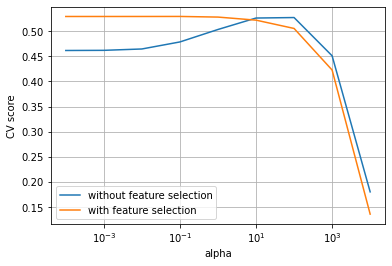

Without feature selection:
Optimal alpha  = 100.0000
Optimal R2 score = 0.5273

With feature selection:
Optimal alpha  = 0.1000
Optimal R2 score = 0.5295


In [106]:
scores = grid_cv.cv_results_['mean_test_score']
plt.plot(alphas, scores, label="without feature selection")
scores_k_best = grid_cv_k_best.cv_results_['mean_test_score']
plt.plot(alphas, scores_k_best, label="with feature selection")

plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")
plt.grid()
plt.legend()
plt.show()

print("Without feature selection:")
print("Optimal alpha  = %.4f" % grid_cv.best_params_['estimator__alpha'])
print("Optimal R2 score = %.4f" % grid_cv.best_score_)
print()
print("With feature selection:")
print("Optimal alpha  = %.4f" % grid_cv_k_best.best_params_['estimator__alpha'])
print("Optimal R2 score = %.4f" % grid_cv_k_best.best_score_)

- Select the better model, fix the optimal value of the regularization coefficient, fit it on the training set, and estimate its performance on the test set `X_te`. 

In [107]:
model = grid_cv_k_best.best_estimator_
R2_tr, R2_te = evaluate_model(model, X_tr, y_tr, X_te, y_te)

print("Train R2 = %.2f" % R2_tr)
print("Test R2 = %.2f" % R2_te)

Train R2 = 0.54
Test R2 = 0.59


Also, we can perform the search of optimal number of selected features `k`. However, the optimal strength of regularization will also depend on the number of selected features, since models with larger number of features usually need stronger regularization. Thus, it is a good idea to perform grid search for two these parameters simultaneously.

<!-- Also, we can still assume that some of the features generated by the one-hot encoding of categorical variables are redundant. In this case, you may want to use a $l_1$ -regularization, which is more likely to assign exactly zero weights to insignificant variables. Thus, an internal feature selection by importance is performed, and the final model depends on a smaller number of variables.

Among `sklearn.linear_models`, you can find implementation of the regression models with $l_1$ regularization (`Lasso`), $l_2$ regularization (`Ridge`), as well as their combination (`ElasticNet`). -->

---
**Task 2.2** [1pt] <a class="anchor" id="task2_2"></a>

Perform grid search for 2 hyperparameters to find both optimal **regularization coefficient** value (`alpha`) and **number of features** ($k$) for the pipeline with univariate feature selection (`model_k_best` from task 1.4).

Blow we define:
- `alphas` - list of regularization coefficient to search through. 
- `ks` - list of number of features values to search through.

Your task:
- Create `grid_cv_k_best` 
    - `GridSearchCV` object
    - Use `alphas` and `ks` to define parameter grid for estimator and feature selector

- Fit `grid_cv_k_best` on the whole training set `X_tr`. Optimize $R^2$-score on 3-fold cross-validation. 

In [108]:
model_k_best.set_params(estimator__random_state=0);
alphas = np.logspace(-4, 4, 9)
ks = np.arange(20, 310, 30)
#print(X_tr.shape, y_tr.shape)

# your code here
grid_cv_k_best = GridSearchCV(model_k_best, param_grid=param_grid, cv=3, scoring = 'r2')
#grid_cv_k_best.fit(X_tr, y_tr)


In [109]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=1)
grid_cv_k_best.fit(X_tr, y_tr)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('col_transformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='ignore',
                            

In [110]:
print('Best pipeline:')
print(grid_cv_k_best.best_estimator_.steps[0])
print(grid_cv_k_best.best_estimator_.steps[1])
print(grid_cv_k_best.best_estimator_.steps[2])

best_k = grid_cv_k_best.best_estimator_
assert isinstance(best_k.steps[0][1], ColumnTransformer)
assert isinstance(best_k.steps[1][1], SelectKBest)
assert isinstance(best_k.steps[2][1], Ridge)

Best pipeline:
('col_transformer', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('ohe',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6',
                                  'X8'])],
                  verbose=False))
('feat_selector', SelectKBest(k=30, score_func=<function get_abs_corr_coef at 0x7fa3a19583b0>))
('estimator', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001))


In [112]:
scores = grid_cv_k_best.cv_results_['mean_test_score']
heatmap = plt.pcolor(scores.reshape(len(alphas), len(ks)), cmap="RdYlGn")
plt.colorbar(heatmap)
plt.xticks(np.arange(len(ks)) + 0.5, ks)
plt.xlabel("number of features")
plt.yticks(np.arange(len(alphas)) + 0.5, alphas)
plt.ylabel("alpha")
plt.show()

print("Optimal alpha  = %.4f" % grid_cv_k_best.best_estimator_.steps[2][1].alpha)
print("Optimal number of features  = %.4f" % grid_cv_k_best.best_estimator_.steps[1][1].k)
print("Optimal R2 score = %.4f" % grid_cv_k_best.best_score_)

ValueError: cannot reshape array of size 9 into shape (9,10)

In [113]:
# fit the best model and evaluate performance on test set
best_model = grid_cv_k_best.best_estimator_
R2_tr, R2_te = evaluate_model(best_model, X_tr, y_tr, X_te, y_te)
print("Train R2 = %.2f" % R2_tr)
print("Test R2 = %.2f" % R2_te)

Train R2 = 0.54
Test R2 = 0.59
